In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
titanic=sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
features=["pclass","sex","fare","embarked","age"]
target=["survived"]

In [7]:
from sklearn.impute import SimpleImputer
imp_median=SimpleImputer(strategy="median")
titanic[["age"]]=imp_median.fit_transform(titanic[["age"]])

imp_freq=SimpleImputer(strategy="most_frequent")
titanic[["embarked"]]=imp_freq.fit_transform(titanic[["embarked"]])


In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
titanic["sex"]=le.fit_transform(titanic["sex"])
titanic["embarked"]=le.fit_transform(titanic["embarked"])

In [26]:
X = titanic[features]
y = titanic["survived"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [11]:
X_train.head()

,pclass,sex,fare,embarked,age
445,1,1,81.8583,2,4.0
650,3,1,7.8958,2,28.0
172,3,0,11.1333,2,1.0
450,2,1,27.7500,2,36.0
314,2,1,26.2500,2,43.0


In [12]:

# Decision Tree Model - no pruning
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7611940298507462


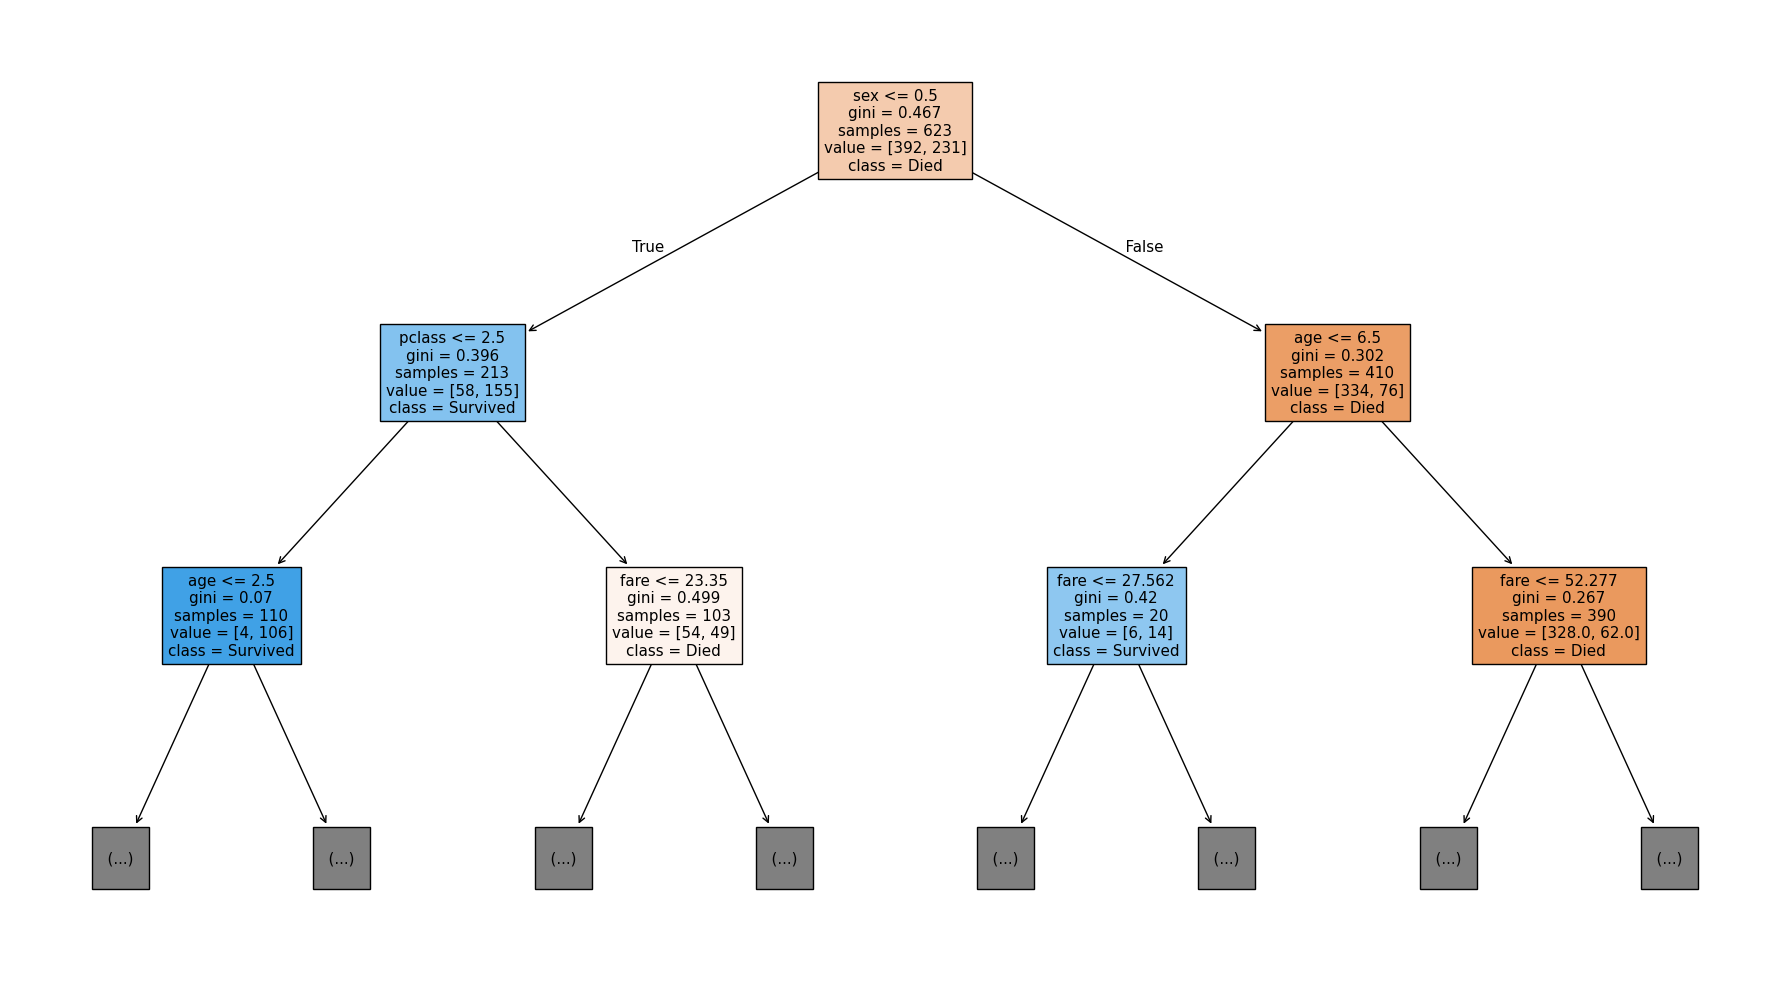

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show()

# Decision Tree with pre-pruning

for depth=2, accuracy=0.7723880597014925
for depth=3, accuracy=0.8059701492537313
for depth=4, accuracy=0.8246268656716418


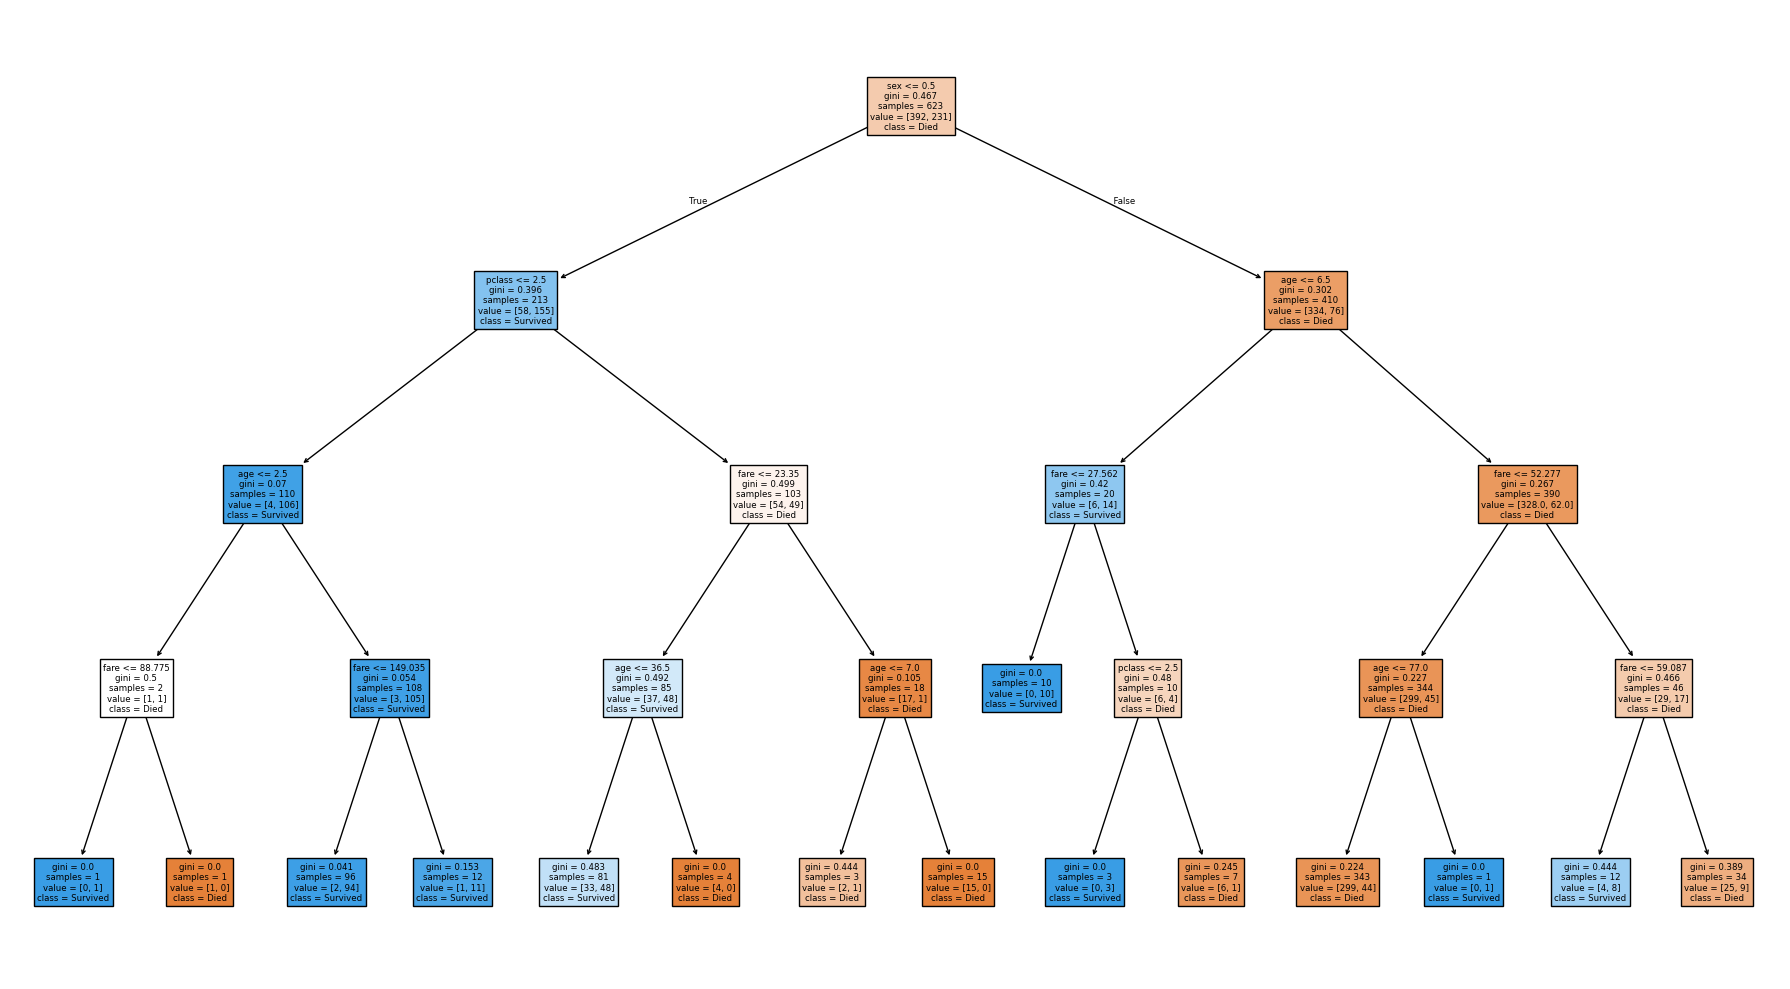

for depth=5, accuracy=0.7947761194029851
for depth=6, accuracy=0.7873134328358209
for depth=7, accuracy=0.7835820895522388
for depth=8, accuracy=0.7910447761194029
for depth=9, accuracy=0.7649253731343284
for depth=10, accuracy=0.7910447761194029


In [15]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

    if depth==4:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

for sample split=5, accuracy=0.8246268656716418
for sample split=10, accuracy=0.8246268656716418


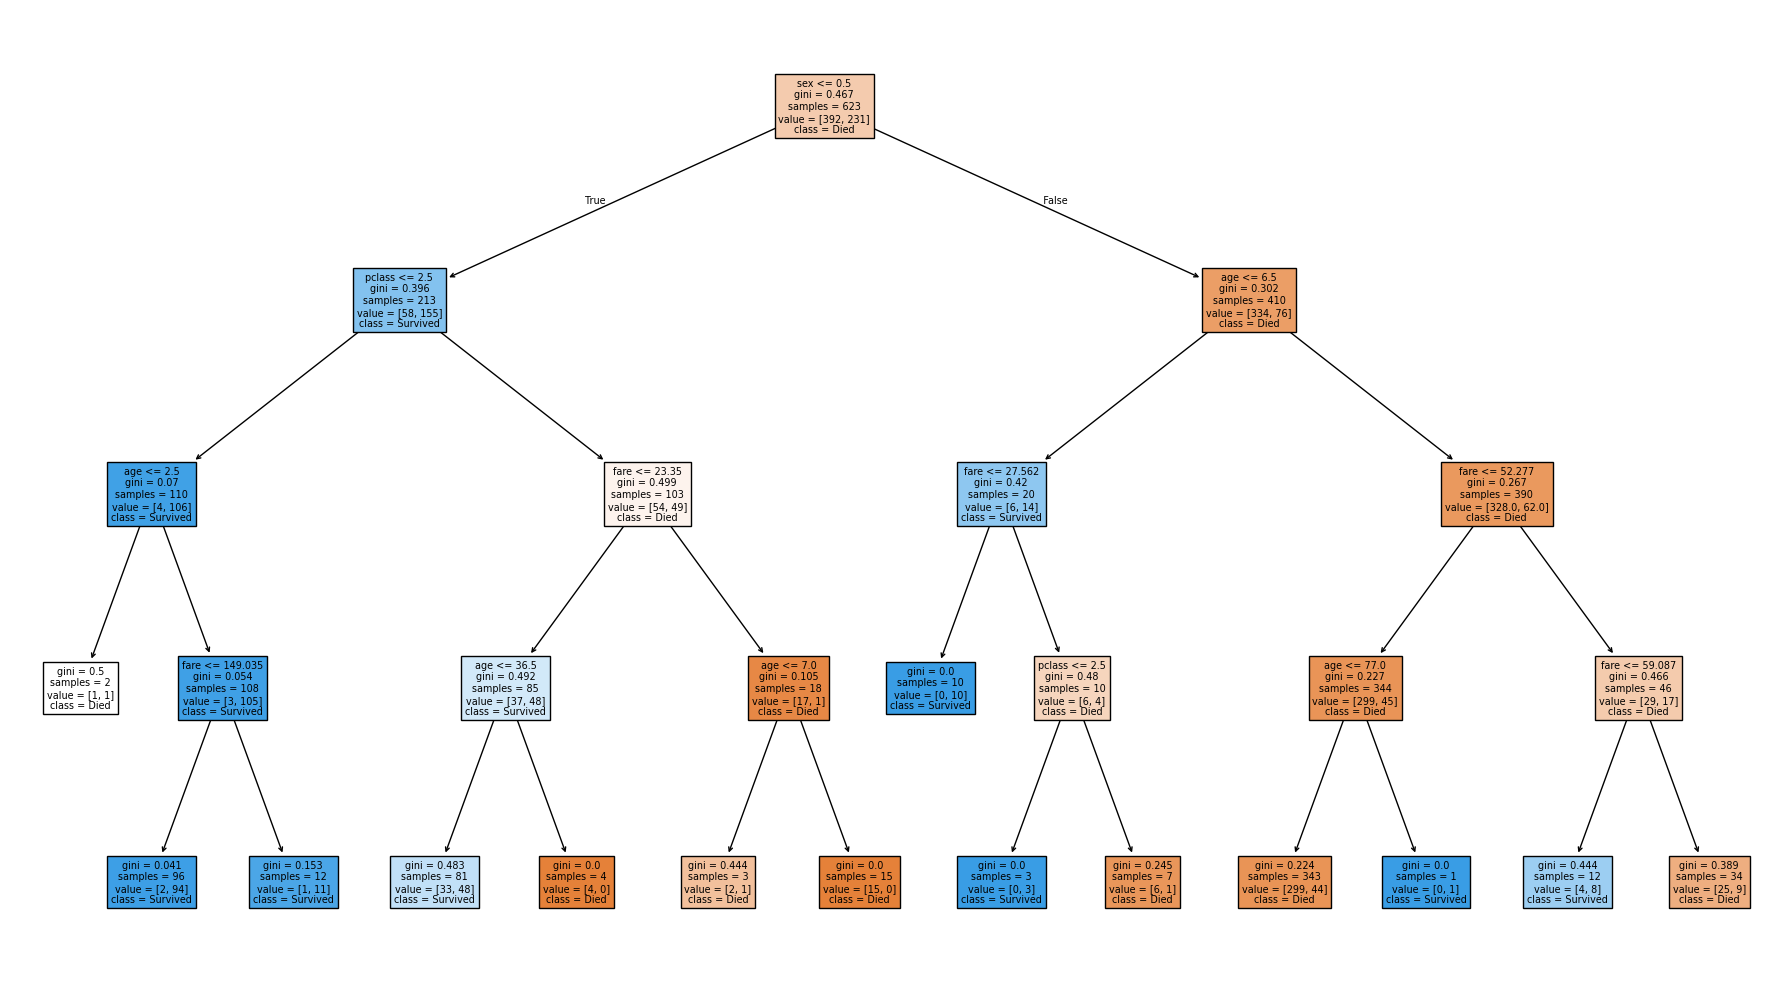

for sample split=15, accuracy=0.8171641791044776
for sample split=20, accuracy=0.8171641791044776
for sample split=25, accuracy=0.8208955223880597
for sample split=30, accuracy=0.8208955223880597


In [16]:
min_samples_splits = [5, 10, 15, 20, 25, 30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

    if split==10:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

# Decision Tree with post-pruning

In [17]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.         0.00013376 0.00013376 0.00022931 0.00032103
 0.00048409 0.00053505 0.00053505 0.00053505 0.00062746 0.00064205
 0.00077709 0.00085607 0.00093633 0.00096308 0.00096308 0.00096308
 0.00099875 0.00101659 0.00104193 0.0010478  0.00107009 0.00109238
 0.00115927 0.0012352  0.00123729 0.00129646 0.00132211 0.00133563
 0.00137583 0.00137583 0.00139708 0.00143228 0.00144145 0.00150482
 0.00151596 0.00152184 0.00171215 0.00183444 0.0019012  0.00195674
 0.00200642 0.00214018 0.00233474 0.0024077  0.00260835 0.00263292
 0.00278606 0.00280169 0.00284379 0.00288925 0.00299625 0.00302412
 0.00431144 0.00495299 0.00577849 0.00589431 0.0074248  0.01236198
 0.01787674 0.04065074 0.1323581 ]


In [19]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [20]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha
        

In [21]:
best_acc

0.8208955223880597

In [22]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=4)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0017121455323702516), max_depth=4)

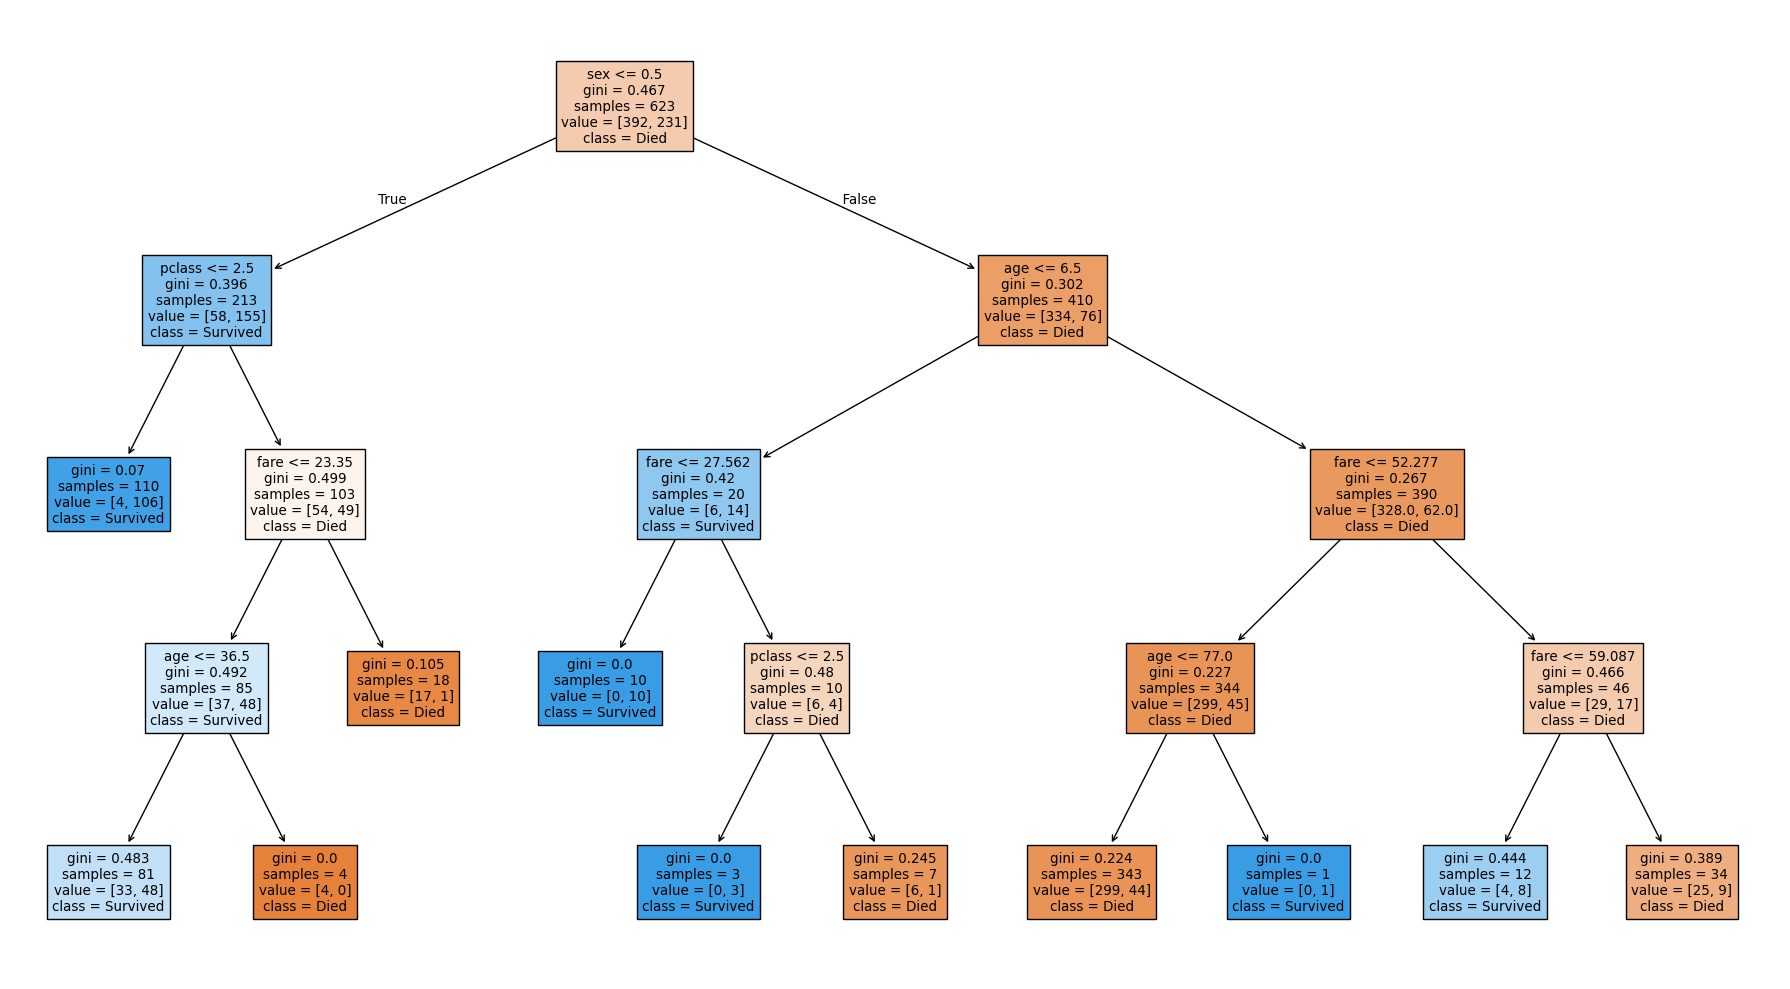

In [23]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()

In [24]:
print(best_model.score(X_test, y_test))

0.8246268656716418


In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=201,
    oob_score=True
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("OOB score: ", rf.oob_score_ * 100, "%")
print("testing accuracy: ", accuracy_score(y_test, y_pred))


C:\Users\United\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


OOB score:  80.73836276083468 %
testing accuracy:  0.7798507462686567
